In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [ ]:

# Load dataset
file_path = "C:/User/hari/Downloads/amazon_sales_dataset.csv"
amazon = pd.read_csv(file_path)
amazon.head(5)

Date  Store  Dept  Unnamed: 3  Weekly_Sales Type    Size  \
0  05-02-2019      1     1  05-02-2019      24924.50    A  151315   
1  05-02-2019      9    97  05-02-2019        668.48    B  125833   
2  05-02-2019      9    85  05-02-2019        693.87    B  125833   
3  05-02-2019      8    80  05-02-2019       8654.60    A  155078   
4  05-02-2019      9    55  05-02-2019      11123.56    B  125833   

   Temperature  Fuel_Price         CPI  ...  IsHoliday  Year  Month  Week  \
0        42.31       2.572  211.096358  ...          0  2019      2     5   
1        38.01       2.572  214.655459  ...          0  2019      2     5   
2        38.01       2.572  214.655459  ...          0  2019      2     5   
3        34.14       2.572  214.471451  ...          0  2019      2     5   
4        38.01       2.572  214.655459  ...          0  2019      2     5   

        max       min          mean    median          std  Total_MarkDown  
0  57592.12  14537.37  22513.322940  18535.48  9854.349032               0  
1    766.93     -9.92    372.655556    371.05   290.954675               0  
2   2512.14    110.56    876.629441    824.04   307.436056               0  
3  11990.43   7414.43   9188.915105   9161.97   756.223236               0  
4  29166.26   4791.74   8607.050490   7571.60  3874.176095               0  

[5 rows x 21 columns]

In [15]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7069 non-null   object 
 1   Store           7069 non-null   int64  
 2   Dept            7069 non-null   int64  
 3   Unnamed: 3      7069 non-null   object 
 4   Weekly_Sales    7069 non-null   float64
 5   Type            7069 non-null   object 
 6   Size            7069 non-null   int64  
 7   Temperature     7069 non-null   float64
 8   Fuel_Price      7069 non-null   float64
 9   CPI             7069 non-null   float64
 10  Unemployment    7069 non-null   float64
 11  IsHoliday       7069 non-null   int64  
 12  Year            7069 non-null   int64  
 13  Month           7069 non-null   int64  
 14  Week            7069 non-null   int64  
 15  max             7069 non-null   float64
 16  min             7069 non-null   float64
 17  mean            7069 non-null   f

In [16]:
amazon.describe()

Store         Dept  Weekly_Sales           Size  Temperature  \
count  7069.000000  7069.000000   7069.000000    7069.000000  7069.000000   
mean     22.146980    43.355779  13162.967311  138497.527656    33.643728   
std      12.941153    29.865223  15214.323124   59858.861890    10.186346   
min       1.000000     1.000000      0.000000   34875.000000    14.480000   
25%      11.000000    18.000000   2075.280000   93638.000000    25.920000   
50%      22.000000    36.000000   7636.460000  140167.000000    32.440000   
75%      33.000000    71.000000  18612.510000  202505.000000    40.190000   
max      45.000000    99.000000  72596.620000  219622.000000    62.160000   

        Fuel_Price          CPI  Unemployment    IsHoliday    Year   Month  \
count  7069.000000  7069.000000   7069.000000  7069.000000  7069.0  7069.0   
mean      2.677894   171.375402      8.158846     0.376432  2019.0     2.0   
std       0.142073    37.848419      1.079139     0.484525     0.0     0.0   
min       2.472000   126.442065      5.892000     0.000000  2019.0     2.0   
25%       2.550000   131.586613      7.368000     0.000000  2019.0     2.0   
50%       2.598000   189.381697      8.324000     0.000000  2019.0     2.0   
75%       2.773000   210.752605      8.992000     1.000000  2019.0     2.0   
max       2.962000   214.850618     10.115000     1.000000  2019.0     2.0   

              Week            max           min          mean        median  \
count  7069.000000    7069.000000   7069.000000   7069.000000   7069.000000   
mean      5.915405   29742.353627   8294.618899  13137.311215  12362.075342   
std       0.785174   37459.545434  11113.591473  14954.571354  14621.058806   
min       5.000000       0.020000  -1008.960000   -116.454545    -26.500000   
25%       5.000000    5850.000000    662.500000   2324.615532   2012.000000   
50%       6.000000   17517.880000   3827.990000   7549.109021   6844.820000   
75%       7.000000   41615.510000  11322.870000  18687.708250  17278.210000   
max       7.000000  406988.630000  65759.030000  88666.468390  87616.410000   

                std  Total_MarkDown  
count   7069.000000          7069.0  
mean    3530.404734             0.0  
std     4870.820128             0.0  
min        0.000000             0.0  
25%      737.916525             0.0  
50%     1905.108021             0.0  
75%     4273.221688             0.0  
max    49692.185570             0.0

In [17]:
amazon.shape[0], amazon.shape[1]

(7069, 21)

In [18]:

# Drop irrelevant columns
amazon = amazon.drop(columns=["Unnamed: 3", "Date"])

# Encode categorical features
le = LabelEncoder()
amazon["Type"] = le.fit_transform(amazon["Type"])

amazon.head(5)

Store  Dept  Weekly_Sales  Type    Size  Temperature  Fuel_Price  \
0      1     1      24924.50     0  151315        42.31       2.572   
1      9    97        668.48     1  125833        38.01       2.572   
2      9    85        693.87     1  125833        38.01       2.572   
3      8    80       8654.60     0  155078        34.14       2.572   
4      9    55      11123.56     1  125833        38.01       2.572   

          CPI  Unemployment  IsHoliday  Year  Month  Week       max       min  \
0  211.096358         8.106          0  2019      2     5  57592.12  14537.37   
1  214.655459         6.415          0  2019      2     5    766.93     -9.92   
2  214.655459         6.415          0  2019      2     5   2512.14    110.56   
3  214.471451         6.299          0  2019      2     5  11990.43   7414.43   
4  214.655459         6.415          0  2019      2     5  29166.26   4791.74   

           mean    median          std  Total_MarkDown  
0  22513.322940  18535.48  9854.349032               0  
1    372.655556    371.05   290.954675               0  
2    876.629441    824.04   307.436056               0  
3   9188.915105   9161.97   756.223236               0  
4   8607.050490   7571.60  3874.176095               0

In [19]:
amazon.shape[0], amazon.shape[1]

(7069, 19)

In [20]:

# Define X (features) and Y (target)
X = amazon.drop(columns=["Weekly_Sales"])
y = amazon["Weekly_Sales"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [21]:

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [22]:

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)*100


In [23]:
print("R-squared:",r2)
print("Mean Absolute Error:",mae)
print("Mean Square Error:",mse)
print("Mean Error",rmse)

R-squared: 96.15238980152158
Mean Absolute Error: 1622.233909589816
Mean Square Error: 8630866.41037764
Mean Error 2937.833625373915


In [24]:
pd.DataFrame(y_pred,y_test)

0
Weekly_Sales            
14026.65      12680.0911
20858.90      14329.5403
37447.60      40957.1045
18985.29      19580.6907
231.78          355.6677
...                  ...
9803.81        9090.3145
8367.75       11138.1916
3569.91        4815.9872
14027.73       9994.3948
9412.57        9931.1945

[3535 rows x 1 columns]

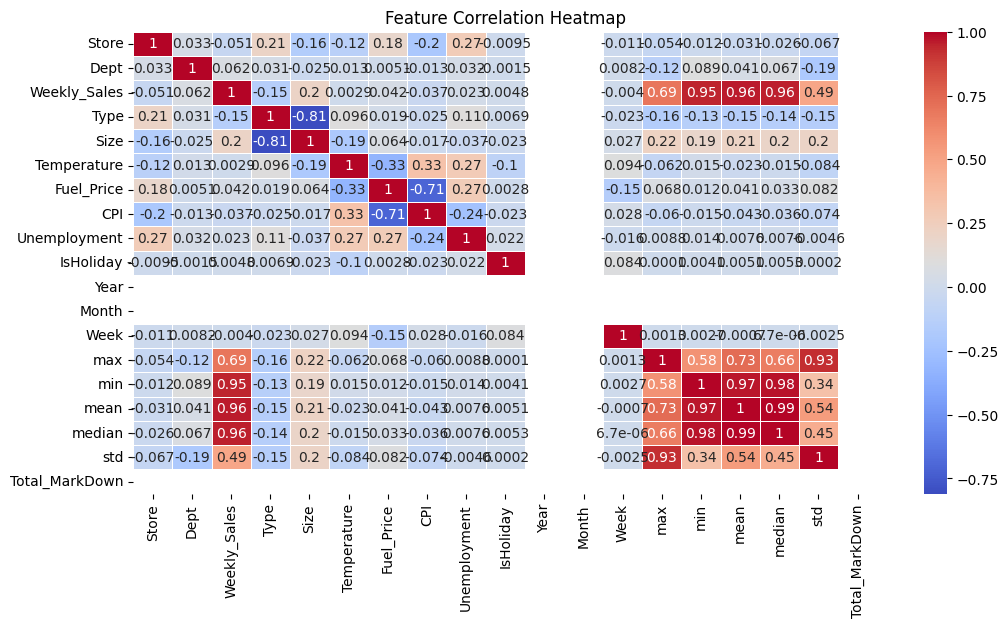

In [25]:

# EDA - Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(amazon.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


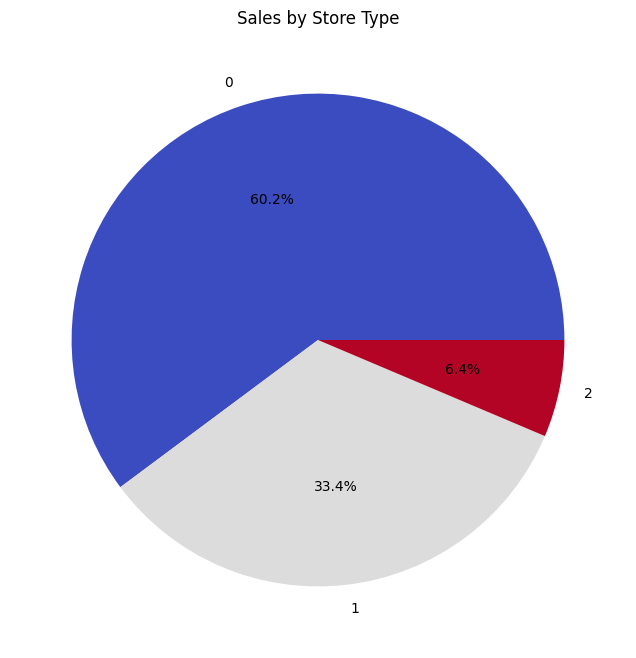

In [26]:

# EDA - Sales by Store Type (Pie Chart)
amazon.groupby("Type")["Weekly_Sales"].sum().plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), cmap='coolwarm')
plt.title("Sales by Store Type")
plt.ylabel("")
plt.show();

In [ ]:


# EDA - Sales vs Temperature (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=amazon["Temperature"], y=amazon["Weekly_Sales"], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Sales vs. Temperature")
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>